# WeatherPy



In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [63]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Creating a DataFrame to store weather info

In [64]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': "", 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Wind Speed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,coihaique,,,,,,,,
1,ilulissat,,,,,,,,
2,albany,,,,,,,,
3,ushuaia,,,,,,,,
4,kavieng,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
#Defining the base URL for weather API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Printining log information
print("        Beginning Data Retrieval     ")
print("------------------------------------------------")

#Defining variables for set and record count
record_count = 1
set_count = 1

#Looping through all cities to get info by calling API
for index, row in city_weather.iterrows(): 
    
    #Getting final URL
    query_url = url + "&q=" + row['City']
    
    #Parsing the JSON and retrieving data
    response = requests.get(query_url).json()
    
    #If any city not found then raise exception and continue
    try: 
        #Log information
        print(f'Processing Record {record_count} of Set {set_count} | {response["name"]}')          
                      
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Country'] = response["sys"]["country"]
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Wind Speed'] = response['wind']['speed']
        
        #Increase the record count
        record_count += 1
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        pass
    
    #If record count is greater than 50, then re-initiate the variables
    if record_count == 51:
        set_count += 1
        record_count = 1
      
        
print("------------------------------------------------")
print("        Data Retrieval Complete      ")
print("------------------------------------------------")
              

        Beginning Data Retrieval     
------------------------------------------------
Processing Record 1 of Set 1 | Coihaique
Processing Record 2 of Set 1 | Ilulissat
Processing Record 3 of Set 1 | Albany
Processing Record 4 of Set 1 | Ushuaia
Processing Record 5 of Set 1 | Kavieng
Processing Record 6 of Set 1 | Kaka
Processing Record 7 of Set 1 | Geraldton
Processing Record 8 of Set 1 | Kolosovka
Processing Record 9 of Set 1 | Lethem
Processing Record 10 of Set 1 | Ribeira Grande
Processing Record 11 of Set 1 | Tuktoyaktuk
Processing Record 12 of Set 1 | Sept-Iles
Processing Record 13 of Set 1 | Port Elizabeth
City not found. Skipping...
Processing Record 14 of Set 1 | Port Blair
Processing Record 15 of Set 1 | Rikitea
Processing Record 16 of Set 1 | Narsaq
Processing Record 17 of Set 1 | Puerto Ayora
Processing Record 18 of Set 1 | Saint George
Processing Record 19 of Set 1 | Acapulco
Processing Record 20 of Set 1 | Sarkand
Processing Record 21 of Set 1 | Mataura
Processing Record 

Processing Record 40 of Set 4 | Vostok
Processing Record 41 of Set 4 | Entre Rios
Processing Record 42 of Set 4 | Mar del Plata
Processing Record 43 of Set 4 | Clyde River
Processing Record 44 of Set 4 | Aulla
Processing Record 45 of Set 4 | Stromness
Processing Record 46 of Set 4 | Jiuquan
Processing Record 47 of Set 4 | Chimore
City not found. Skipping...
Processing Record 48 of Set 4 | Takoradi
Processing Record 49 of Set 4 | Barao de Melgaco
Processing Record 50 of Set 4 | Storforshei
Processing Record 1 of Set 5 | Batsfjord
Processing Record 2 of Set 5 | Urucara
Processing Record 3 of Set 5 | Darovskoy
Processing Record 4 of Set 5 | Hay River
Processing Record 5 of Set 5 | Mandali
Processing Record 6 of Set 5 | Norman Wells
Processing Record 7 of Set 5 | Saldanha
City not found. Skipping...
Processing Record 8 of Set 5 | Kudahuvadhoo
Processing Record 9 of Set 5 | Eganville
Processing Record 10 of Set 5 | Svay Rieng
Processing Record 11 of Set 5 | Ponta Delgada
Processing Record 1

Processing Record 23 of Set 8 | Aripuana
Processing Record 24 of Set 8 | Neuquen
Processing Record 25 of Set 8 | Dutse
City not found. Skipping...
Processing Record 26 of Set 8 | Trairi
Processing Record 27 of Set 8 | Biloela
Processing Record 28 of Set 8 | Sangin
Processing Record 29 of Set 8 | Yar-Sale
Processing Record 30 of Set 8 | Fairbanks
Processing Record 31 of Set 8 | Shestakovo
Processing Record 32 of Set 8 | Jalu
Processing Record 33 of Set 8 | Agirish
Processing Record 34 of Set 8 | Maldonado
Processing Record 35 of Set 8 | Yatou
Processing Record 36 of Set 8 | Arraial do Cabo
Processing Record 37 of Set 8 | Katobu
Processing Record 38 of Set 8 | Riom
Processing Record 39 of Set 8 | Port Keats
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 8 | Iranshahr
Processing Record 41 of Set 8 | Portland
Processing Record 42 of Set 8 | Prince Rupert
City not found. Skipping...
Processing Record 43 of Set 8 | Mbandaka
Processing Record 44 of Set 8 |

Processing Record 5 of Set 12 | Santa Maria
Processing Record 6 of Set 12 | Miyazu
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 12 | Zeya
Processing Record 8 of Set 12 | Altus
Processing Record 9 of Set 12 | Baraki Barak
Processing Record 10 of Set 12 | Irtyshskiy
Processing Record 11 of Set 12 | Granite City
Processing Record 12 of Set 12 | La Ronge
Processing Record 13 of Set 12 | Sulingen
Processing Record 14 of Set 12 | Alzamay
------------------------------------------------
        Data Retrieval Complete      
------------------------------------------------


### Cleaning Data and Exporting to Excel file


In [66]:
#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Resetting index after dropna()
city_weather.reset_index(drop=True, inplace=True)

# Export the data into a csv
city_weather.to_csv(output_data_file, index_label="City_ID")

#Display DataFrame
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,coihaique,79,CL,1578203892,71,-45.58,-72.07,50.00,3.36
1,ilulissat,100,GL,1578203892,72,69.22,-51.1,10.40,1.12
2,albany,90,US,1578203764,80,42.65,-73.75,36.00,11.41
3,ushuaia,40,AR,1578203893,76,-54.81,-68.31,48.20,11.41
4,kavieng,100,PG,1578203893,72,-2.57,150.8,84.83,10.31


In [67]:
#Display Detailed count from the DataFrame
city_weather.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

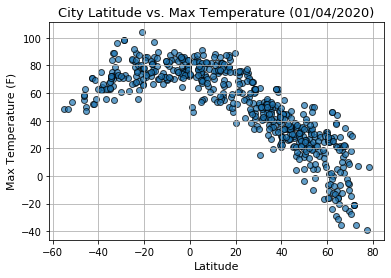

In [68]:
# Define Scatter plot for Lat vs. Temp
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], 
            marker="o",edgecolor="black",alpha=0.7)

#Set X-Axis Label
plt.xlabel("Latitude",fontsize=11) 

#Set Y-Axis Label
plt.ylabel("Max Temperature (F)",fontsize=11)

# Set Graph title
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%m/%d/%Y"),fontsize=13)

# Save the figure
plt.savefig("output_data/latitude-vs-temperature.png")

#Enabling grid lines
plt.grid()

# # Display the Graph
plt.show()

#### Latitude vs. Humidity Plot

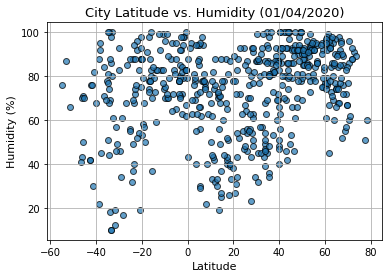

In [69]:
# Define Scatter plot for Lat vs. Humidity
plt.scatter(city_weather["Lat"], city_weather["Humidity"], 
            marker="o",edgecolor="black",alpha=0.7)

#Set X-Axis Label
plt.xlabel("Latitude",fontsize=11) 

#Set Y-Axis Label
plt.ylabel("Humidity (%)",fontsize=11)

# Set Graph title
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m/%d/%Y"),fontsize=13)

# Save the figure
plt.savefig("output_data/latitude-vs-humidity.png")

#Enabling grid lines
plt.grid()

# # Display the Graph
plt.show()

#### Latitude vs. Cloudiness Plot

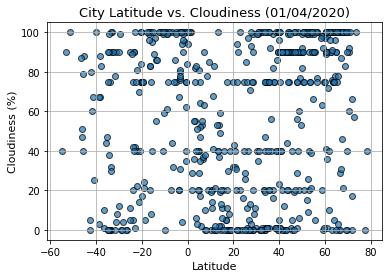

In [70]:
# Define Scatter plot for Lat vs. Cloudiness
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], 
            marker="o",edgecolor="black",alpha=0.7)

#Set X-Axis Label
plt.xlabel("Latitude",fontsize=11) 

#Set Y-Axis Label
plt.ylabel("Cloudiness (%)",fontsize=11)

# Set Graph title
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m/%d/%Y"),fontsize=13)

# Save the figure
plt.savefig("output_data/latitude-vs-cloudiness.png")

#Enabling grid lines
plt.grid()

# # Display the Graph
plt.show()

#### Latitude vs. Wind Speed Plot

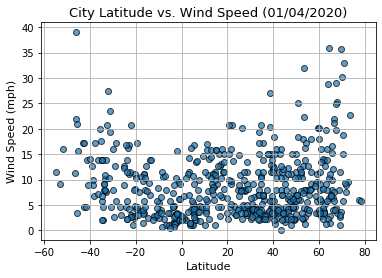

In [71]:
# Define Scatter plot for Lat vs. Cloudiness
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], 
            marker="o",edgecolor="black",alpha=0.7)

#Set X-Axis Label
plt.xlabel("Latitude",fontsize=11) 

#Set Y-Axis Label
plt.ylabel("Wind Speed (mph)",fontsize=11)

# Set Graph title
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m/%d/%Y"),fontsize=13)

# Save the figure
plt.savefig("output_data/latitude-vs-windspeed.png")

#Enabling grid lines
plt.grid()

# # Display the Graph
plt.show()

# Final Analysis
1) As we approach the equator the temperature increases.However, temperature peaks at around 20 degrees latitude, not exactly at the equatorial line. 

2) Humidity do not show a strong correlation to latitude

3) Cloudiness do not show any correlation to latitude

4) The correlation between latitude and wind speed is very weak. However, wind speed appears to slightly increase as we move away from the equator. 